In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

In [2]:
datafile = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(datafile)
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [3]:
df.drop(columns=['INCKEY','COLDETKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','HITPARKEDCAR','SDOT_COLDESC','ST_COLDESC','CROSSWALKKEY','SPEEDING','INATTENTIONIND'],inplace=True)
df.shape

(194673, 26)

### Dependent variables
    SEVERITYCODE 
    COLLISIONTYPE
    PEDCYLCOUNT 
    TIME:
        INCDTTM 
        INCDATE 
	PERSONCOUNT
    VEHCOUNT
    PEDCOUNT
	
### Independent variables:
    weather
    roadcond
    lightcond
    HUMAN RELATED  underinfl
  

In [4]:
df['dayofweek']=pd.to_datetime(df['INCDATE']).dt.dayofweek
df['date_time']=pd.to_datetime(df['INCDTTM'])
df['hour']=df['date_time'].dt.hour

In [5]:
df.drop(columns=['INCDATE','INCDTTM'],inplace = True)
df.shape

(194673, 27)

In [6]:
df.drop(columns=['SEVERITYCODE.1'], inplace = True)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'REPORTNO', 'STATUS', 'ADDRTYPE',
       'INTKEY', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE',
       'SEGLANEKEY', 'dayofweek', 'date_time', 'hour'],
      dtype='object')

In [7]:
df['year']=df['date_time'].dt.year
df['year'].unique()

array([2013, 2006, 2004, 2019, 2008, 2020, 2005, 2009, 2010, 2007, 2014,
       2015, 2011, 2016, 2012, 2018, 2017])

In [8]:
!conda install seaborn

Solving environment: done

# All requested packages already installed.



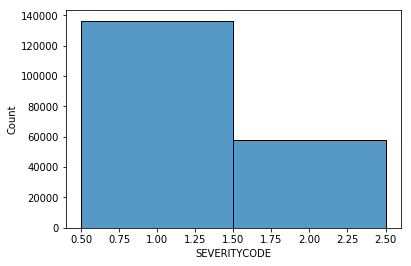

In [9]:
#df = sns.load_dataset("df")
sns.histplot(
    data = df,
    x = "SEVERITYCODE",
    discrete=True,    
    element='bars'
)

In [10]:
df.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND','UNDERINFL'],inplace=True)
df.shape

(189337, 27)

In [11]:
df["UNDERINFL"].replace({"0":'N',"1":"Y"},inplace=True)
df["UNDERINFL"].unique()

array(['N', 'Y'], dtype=object)

In [12]:
df1 = df[df['SEVERITYCODE']==1]
df2 = df[df['SEVERITYCODE']==2]

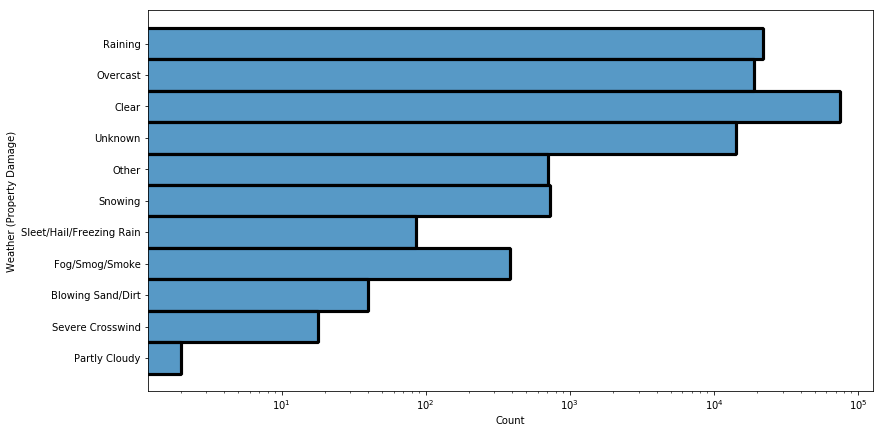

In [13]:
plt.figure(figsize = (13,7))
ax = sns.histplot(
        data = df1,
        y = 'WEATHER'
     )
ax.set(ylabel='Weather (Property Damage)')
plt.xscale("log")
plt.show()

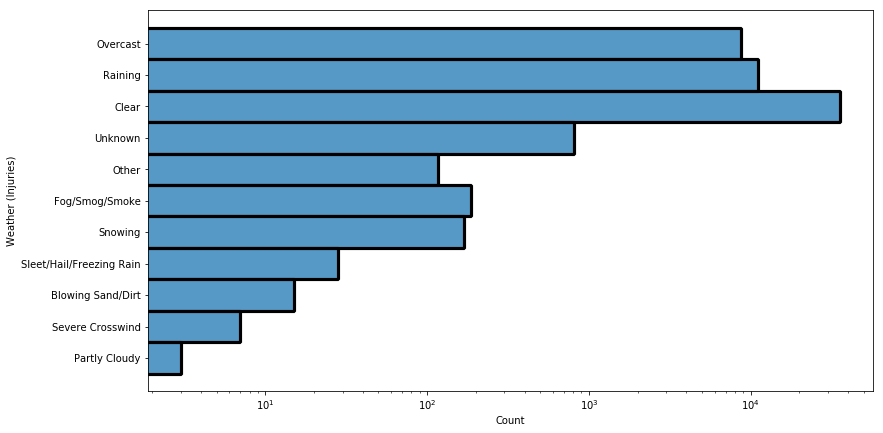

In [14]:
plt.figure(figsize = (13,7))
ax = sns.histplot(
        data = df2,
        y = 'WEATHER',
     )
ax.set(ylabel='Weather (Injuries)')
plt.xscale("log")
plt.show()

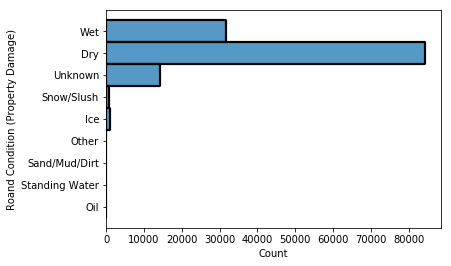

In [15]:
ax = sns.histplot(
        data = df1,
        y = 'ROADCOND',
     )
ax.set(ylabel='Roand Condition (Property Damage)')
plt.show()

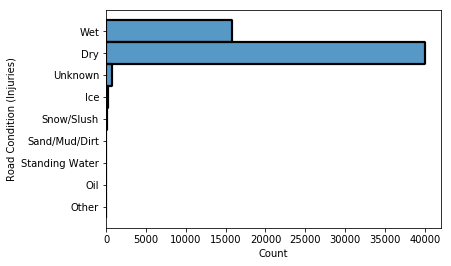

In [16]:
ax = sns.histplot(
        data = df2,
        y = 'ROADCOND',
     )
ax.set(ylabel='Road Condition (Injuries)')
plt.show()

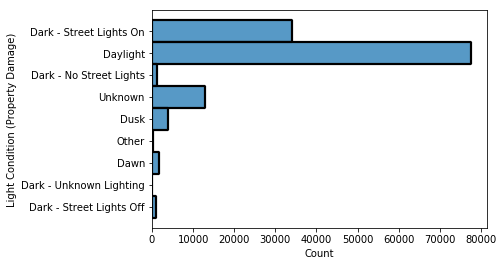

In [17]:
ax = sns.histplot(
        data = df1,
        y = 'LIGHTCOND',
     )
ax.set(ylabel='Light Condition (Property Damage)')
plt.show()

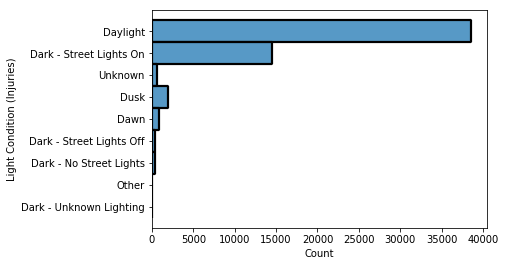

In [18]:
ax = sns.histplot(
        data = df2,
        y = 'LIGHTCOND',
     )
ax.set(ylabel='Light Condition (Injuries)')
plt.show()

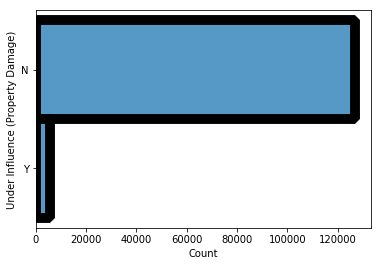

In [19]:
ax = sns.histplot(
        data = df1,
        y = 'UNDERINFL',
     )
ax.set(ylabel='Under Influence (Property Damage)')
plt.show()

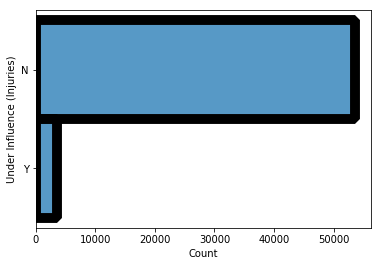

In [20]:
ax = sns.histplot(
        data = df2,
        y = 'UNDERINFL',
     )
ax.set(ylabel='Under Influence (Injuries)')
plt.show()

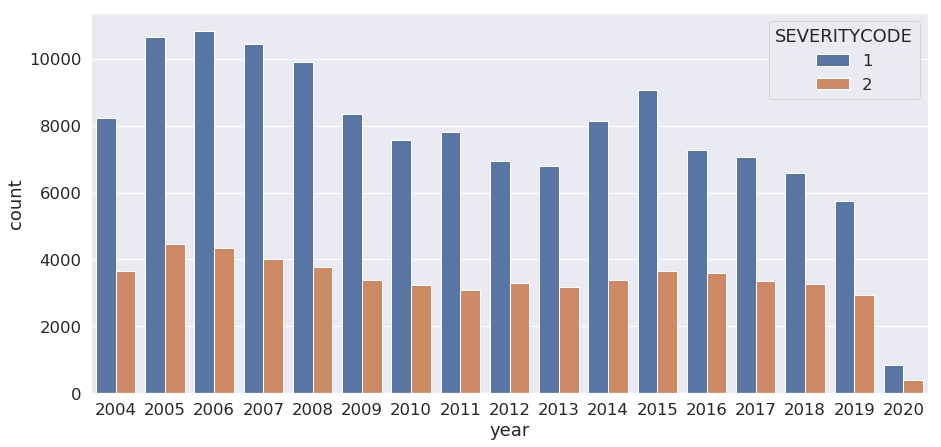

In [21]:
plt.figure(figsize = (15,7))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "year",
        hue="SEVERITYCODE",
        )
plt.show()

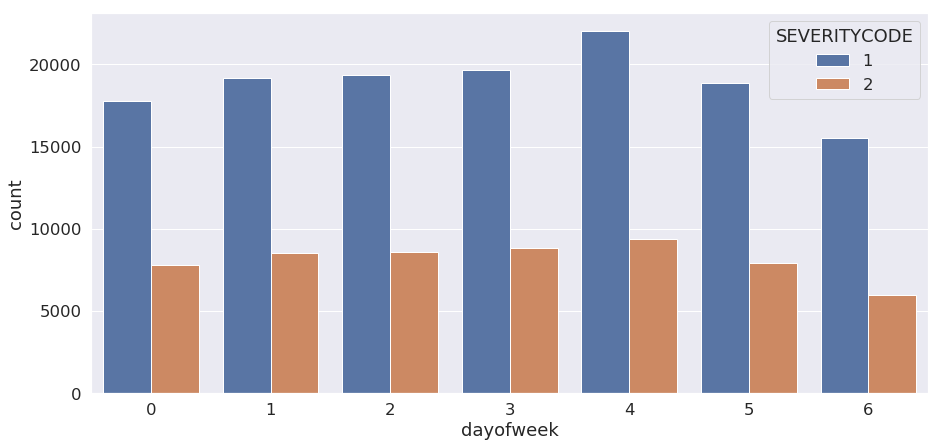

In [22]:
plt.figure(figsize = (15,7))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "dayofweek",
        hue="SEVERITYCODE",
        )
plt.show()

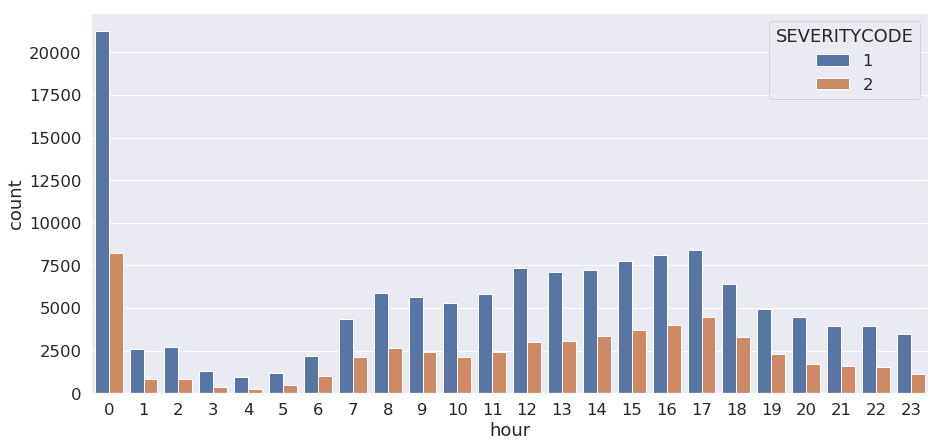

In [23]:
plt.figure(figsize = (15,7))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "hour",
        hue="SEVERITYCODE",
        )
plt.show()

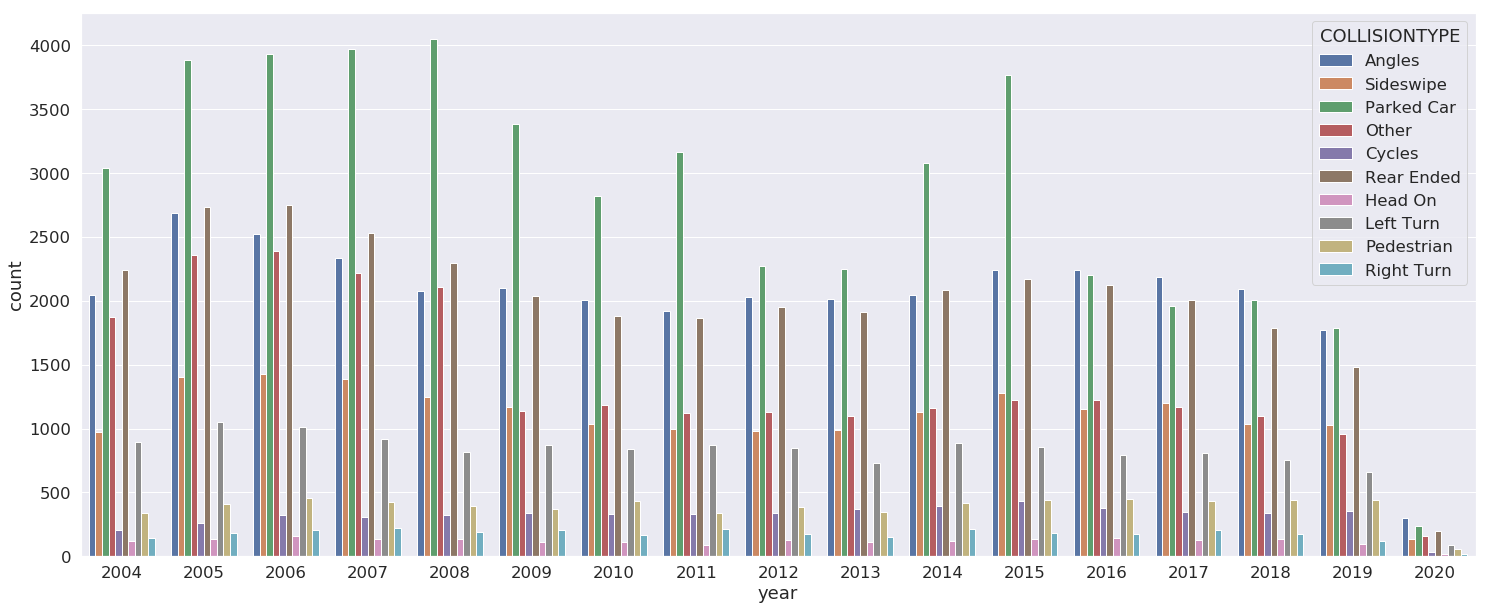

In [24]:
plt.figure(figsize = (25,10))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "year",
        hue="COLLISIONTYPE",
        )
plt.show()

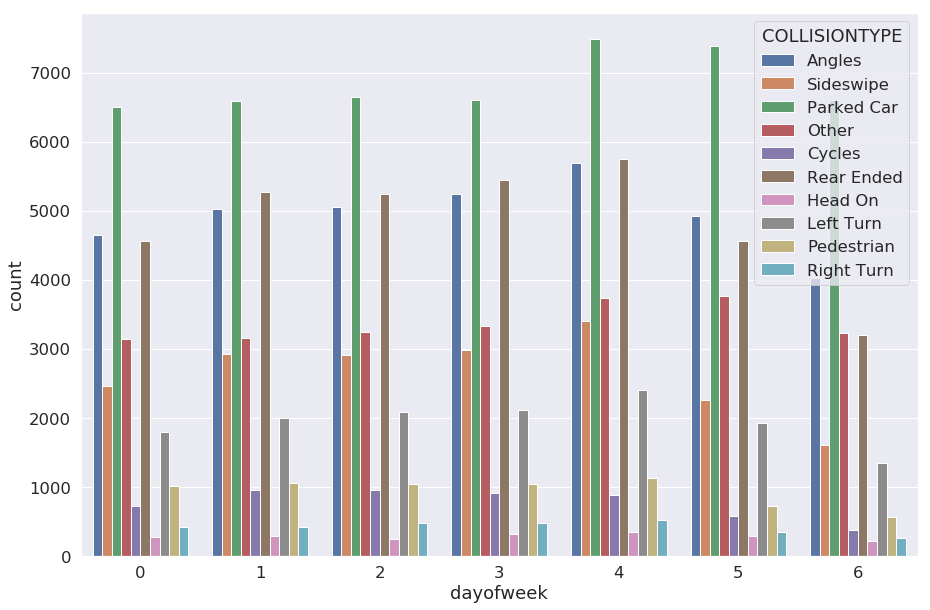

In [25]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "dayofweek",
        hue="COLLISIONTYPE",
        )
plt.show()

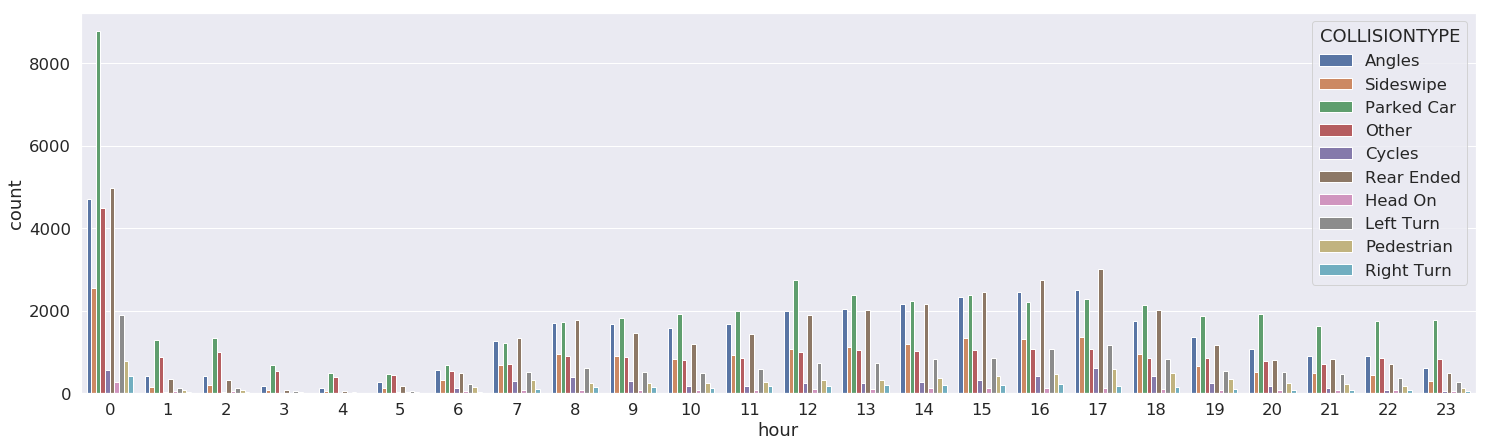

In [26]:
plt.figure(figsize = (25,7))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "hour",
        hue="COLLISIONTYPE",
        )
plt.show()

plt.figure(figsize = (12,12))
sns.set(font_scale=1.5)
ax = sns.catplot(
        data=df, x='dayofweek', y='PERSONCOUNT', hue = 'SEVERITYCODE',
        kind="violin", inner='stick', split=True,
        palette='pastel' ,s=2)
plt.show()

plt.figure(figsize = (12,12))
sns.set(font_scale=1.5)
ax = sns.catplot(
        data=df, x='dayofweek', y='VEHCOUNT', hue = 'SEVERITYCODE',
        kind="violin", inner='stick', split=True,
        palette='pastel' ,s=2)
plt.show()

plt.figure(figsize = (12,12))
sns.set(font_scale=1.5)
ax = sns.catplot(
        data=df, x='dayofweek', y='PEDCOUNT', hue = 'SEVERITYCODE',
        kind="violin", inner='stick', split=True,
        palette='pastel' ,s=2)
plt.show()

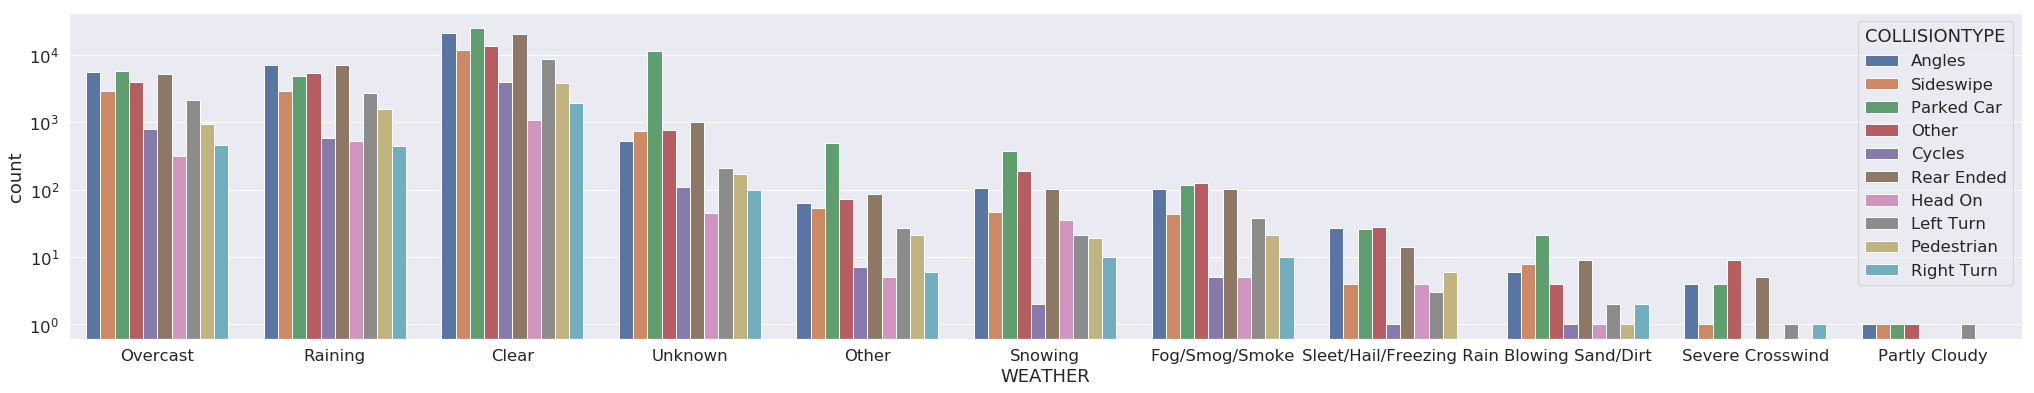

In [27]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "WEATHER",
        hue="COLLISIONTYPE",
        )
plt.yscale("log")
plt.show()

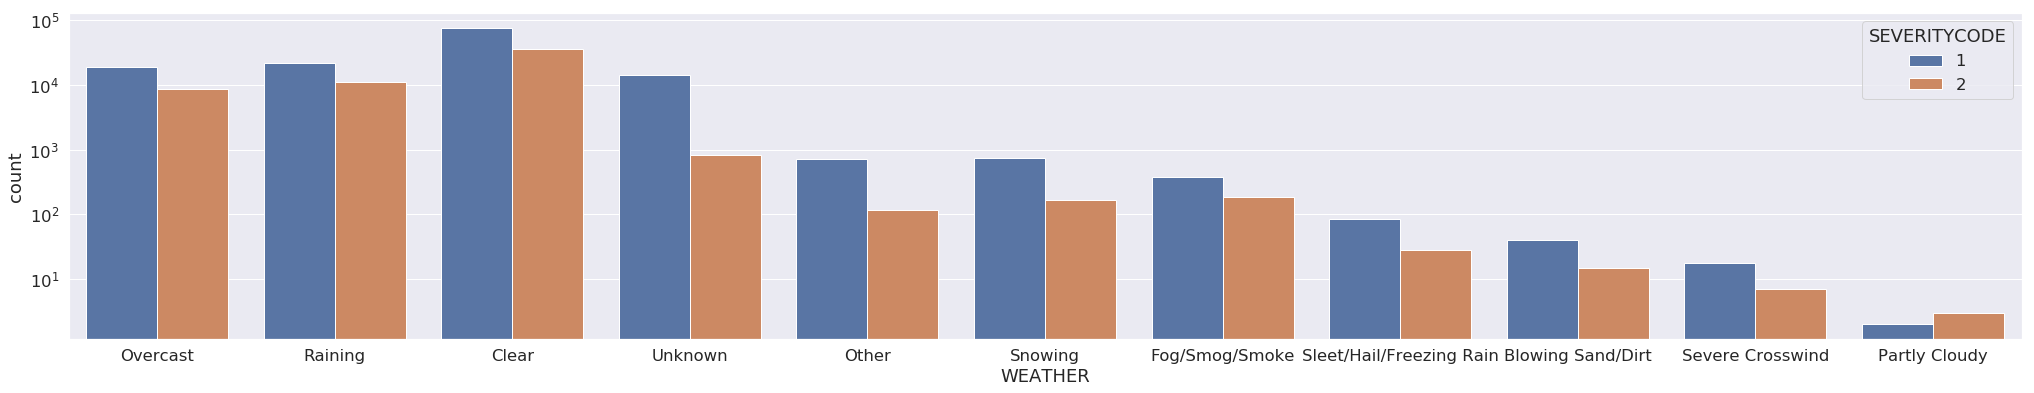

In [28]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "WEATHER",
        hue="SEVERITYCODE",
        )
plt.yscale("log")
plt.show()

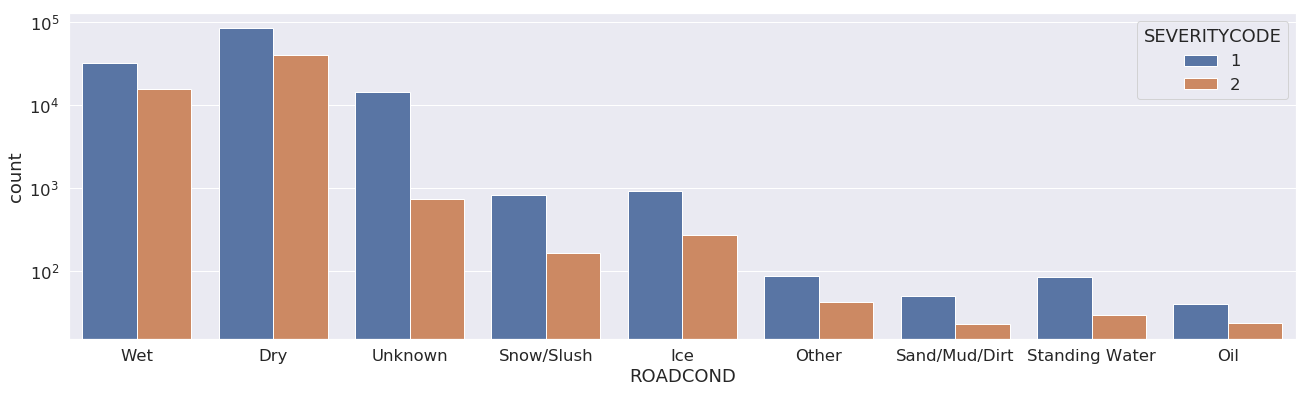

In [29]:
plt.figure(figsize = (22,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "ROADCOND",
        hue="SEVERITYCODE",
        )
plt.yscale("log")
plt.show()

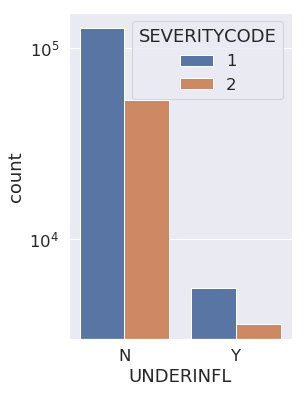

In [30]:
plt.figure(figsize = (4,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "UNDERINFL",
        hue="SEVERITYCODE",
        )
plt.yscale("log")
plt.show()

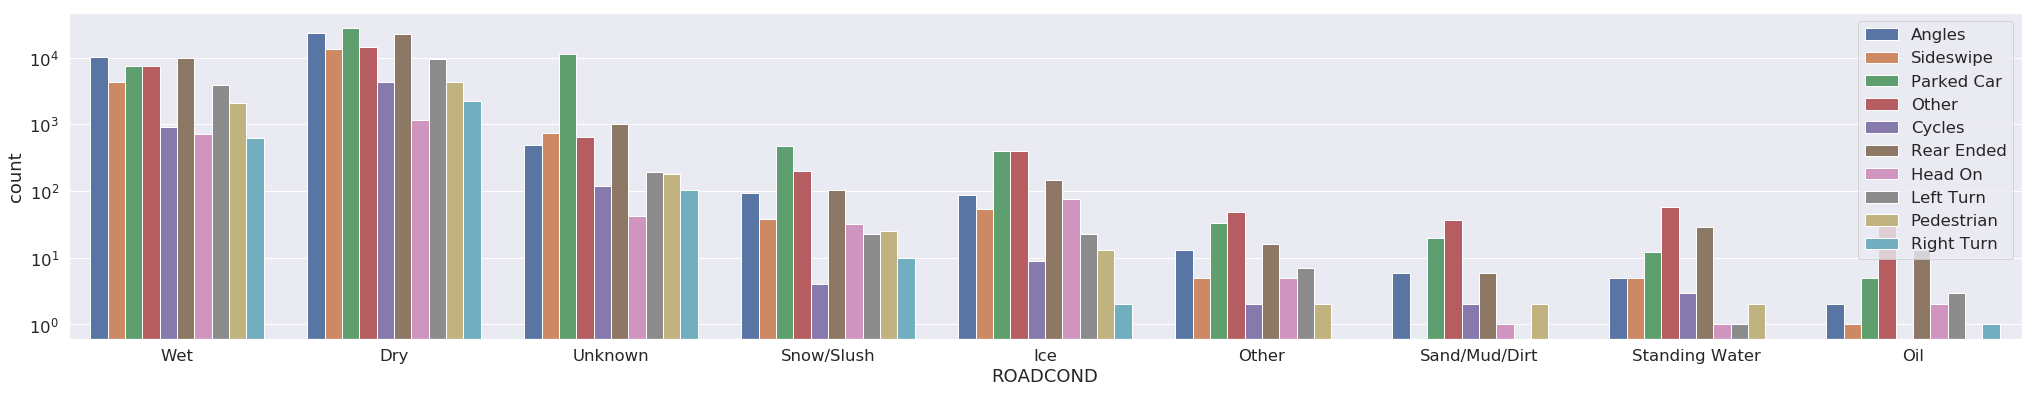

In [31]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "ROADCOND",
        hue="COLLISIONTYPE",
        )
ax.legend(loc=0)
plt.yscale("log")
plt.show()

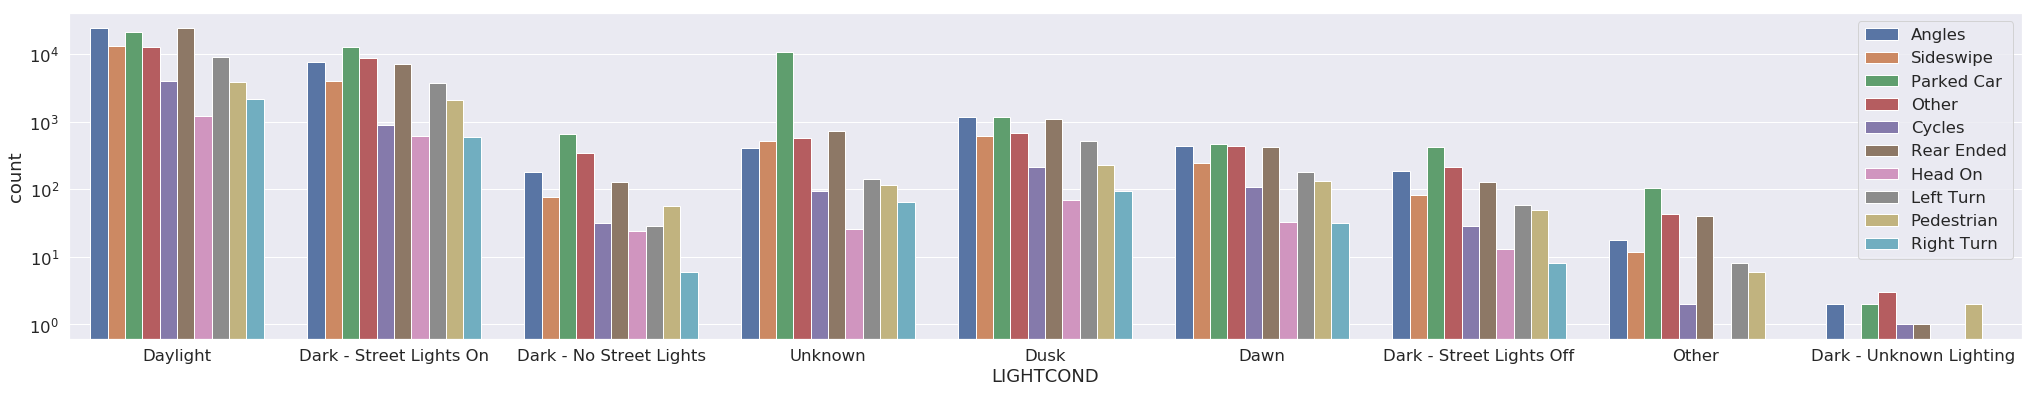

In [32]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "LIGHTCOND",
        hue="COLLISIONTYPE",
        )
ax.legend(loc=0)
plt.yscale("log")
plt.show()

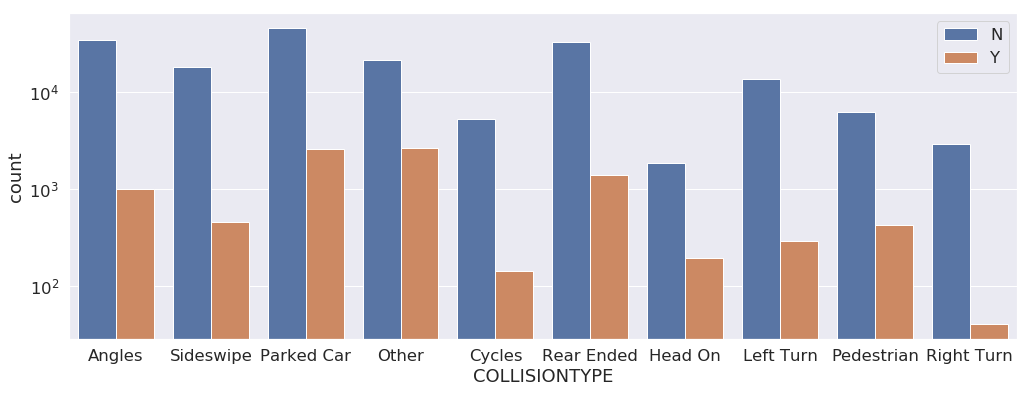

In [33]:
plt.figure(figsize = (17,6))
sns.set(font_scale=1.5)
ax = sns.countplot(
        data = df,
        x = "COLLISIONTYPE",
        hue="UNDERINFL",
        )
ax.legend(loc=0)
plt.yscale("log")
plt.show()

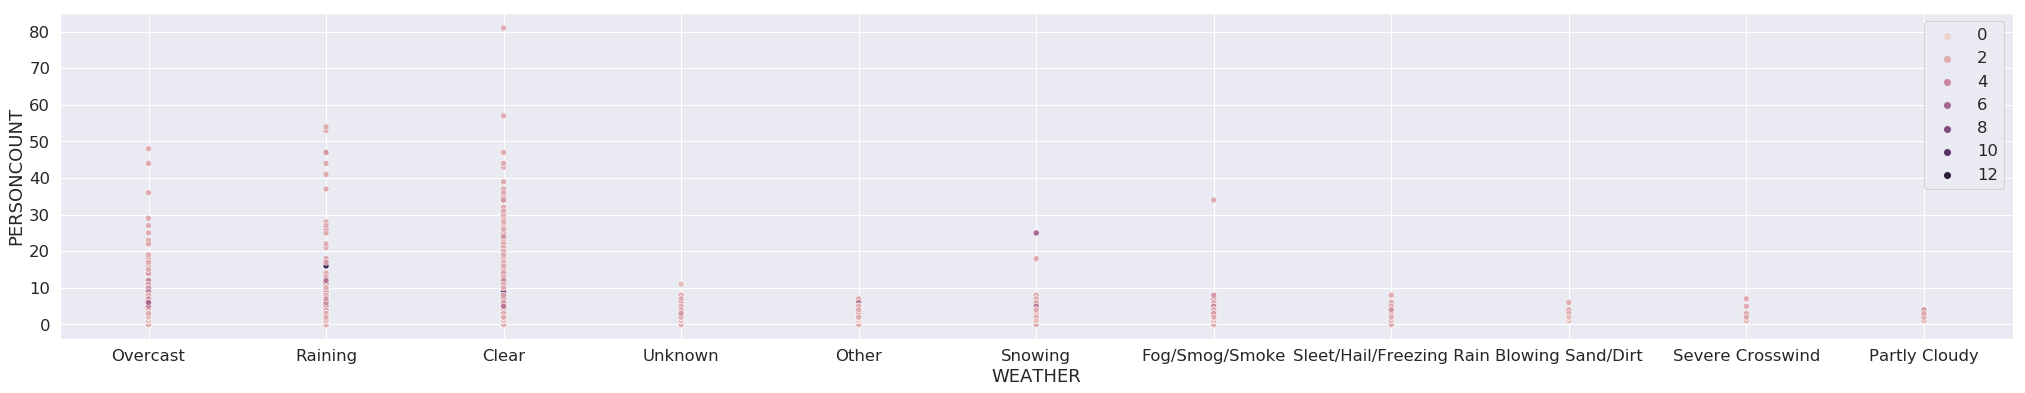

In [34]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "WEATHER",y = "PERSONCOUNT",hue="VEHCOUNT")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

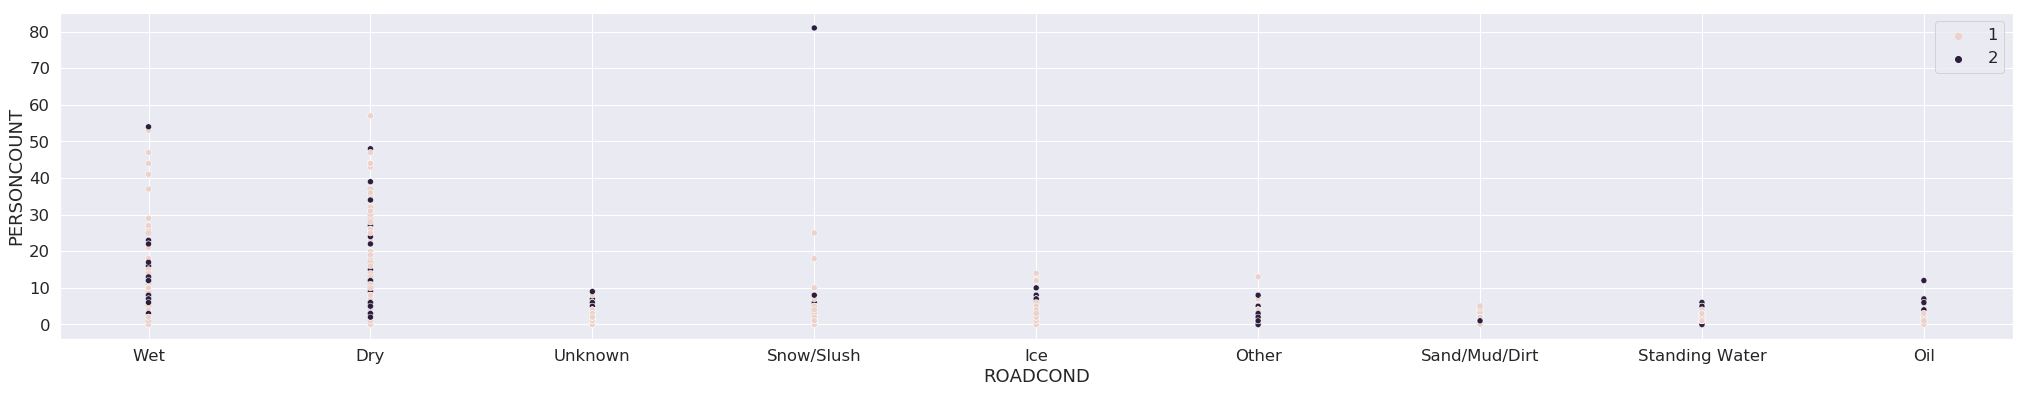

In [35]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "ROADCOND",y = "PERSONCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

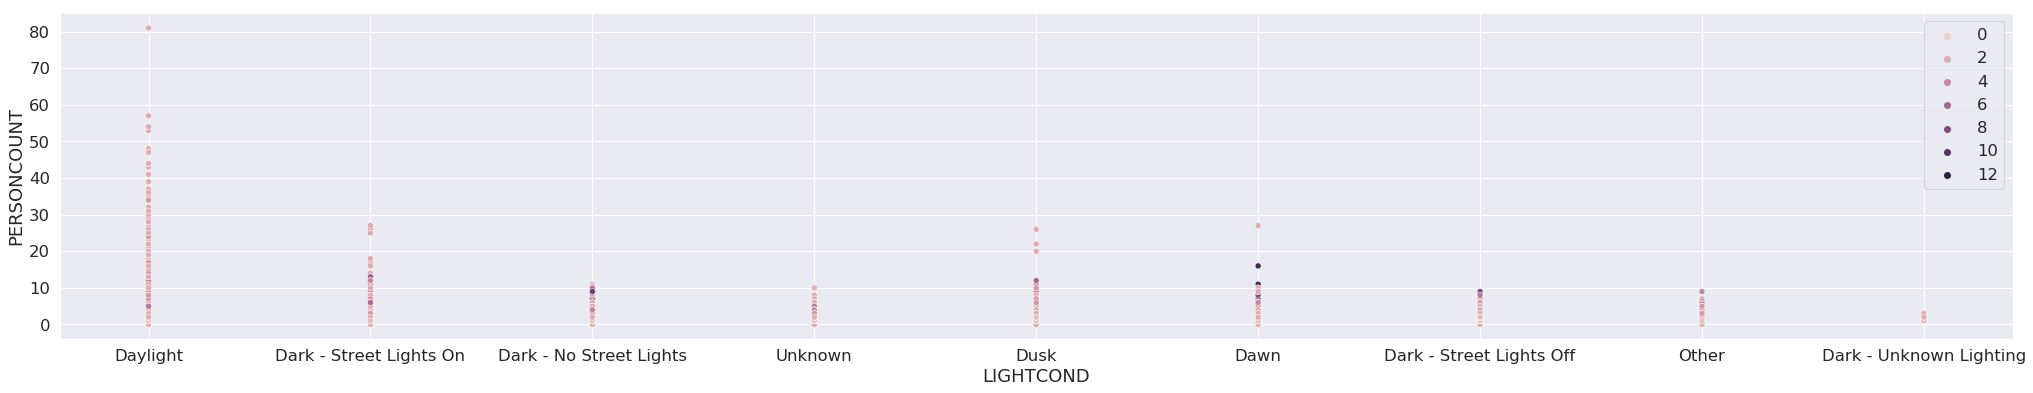

In [36]:
plt.figure(figsize = (35,6))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "LIGHTCOND",y = "PERSONCOUNT",hue="VEHCOUNT")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

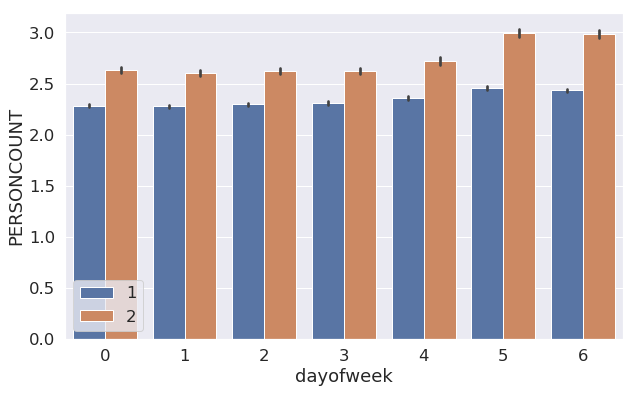

In [45]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "dayofweek",y = "PERSONCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

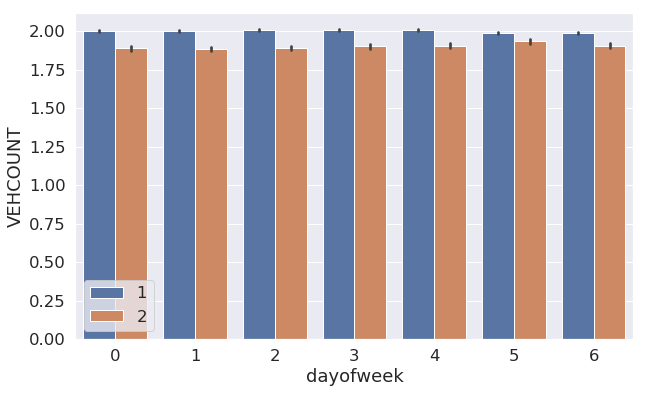

In [46]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "dayofweek",y = "VEHCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

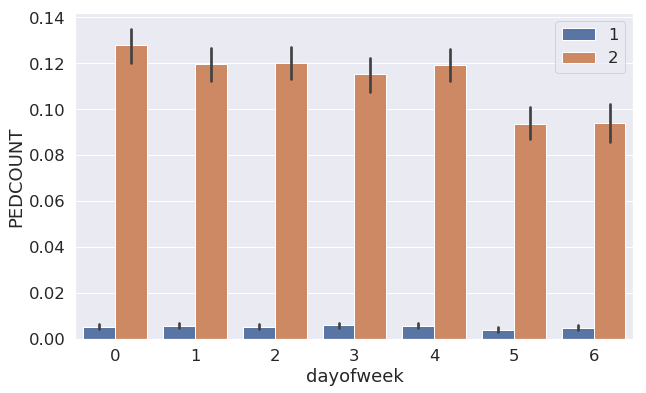

In [47]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "dayofweek",y = "PEDCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

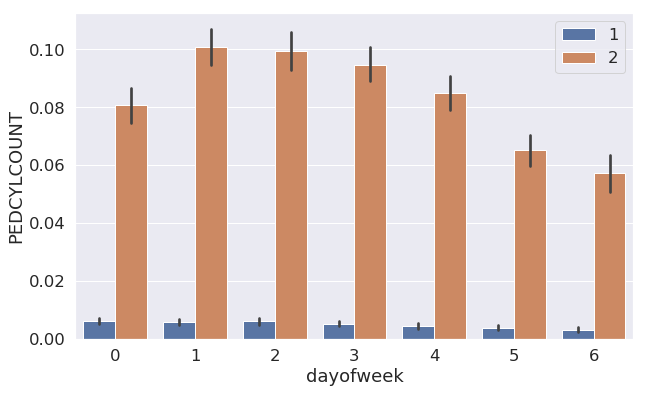

In [48]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "dayofweek",y = "PEDCYLCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

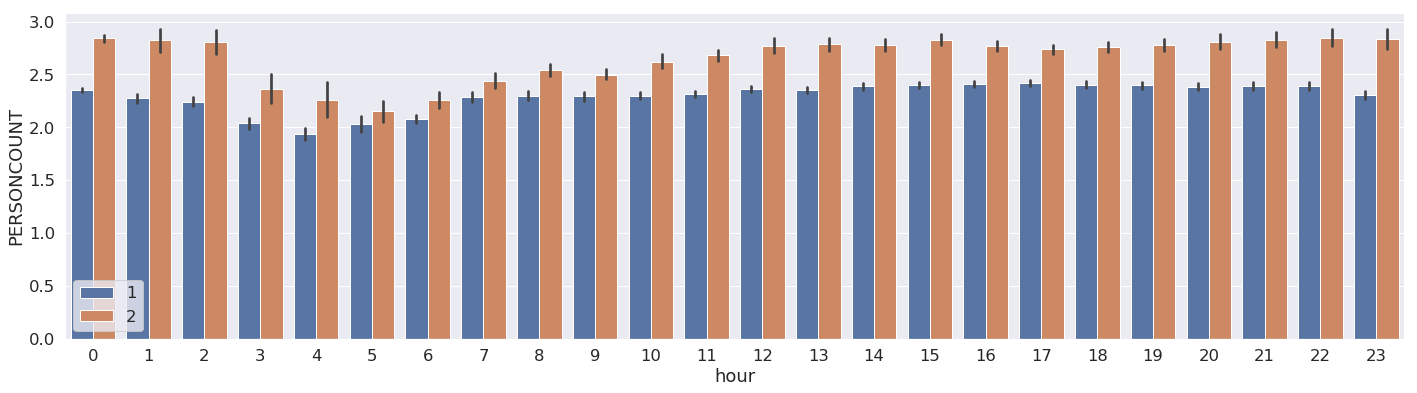

In [49]:
plt.figure(figsize = (24,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "hour",y = "PERSONCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

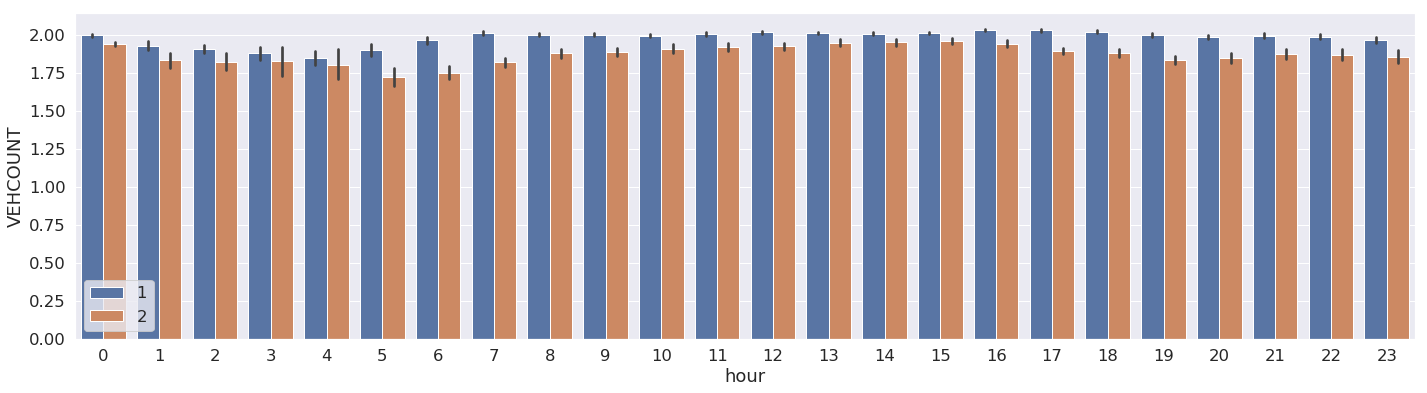

In [50]:
plt.figure(figsize = (24,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "hour",y = "VEHCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

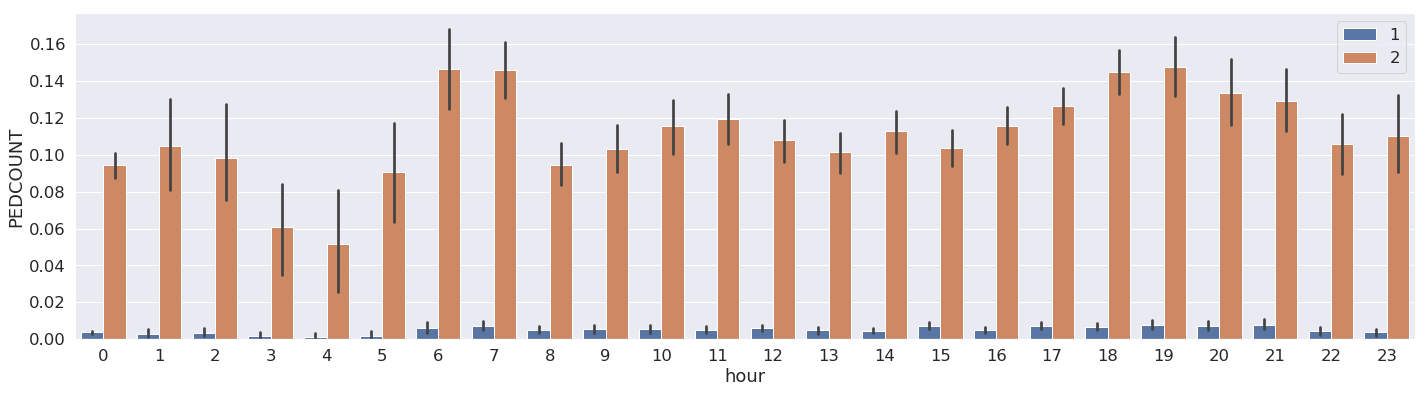

In [51]:
plt.figure(figsize = (24,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "hour",y = "PEDCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

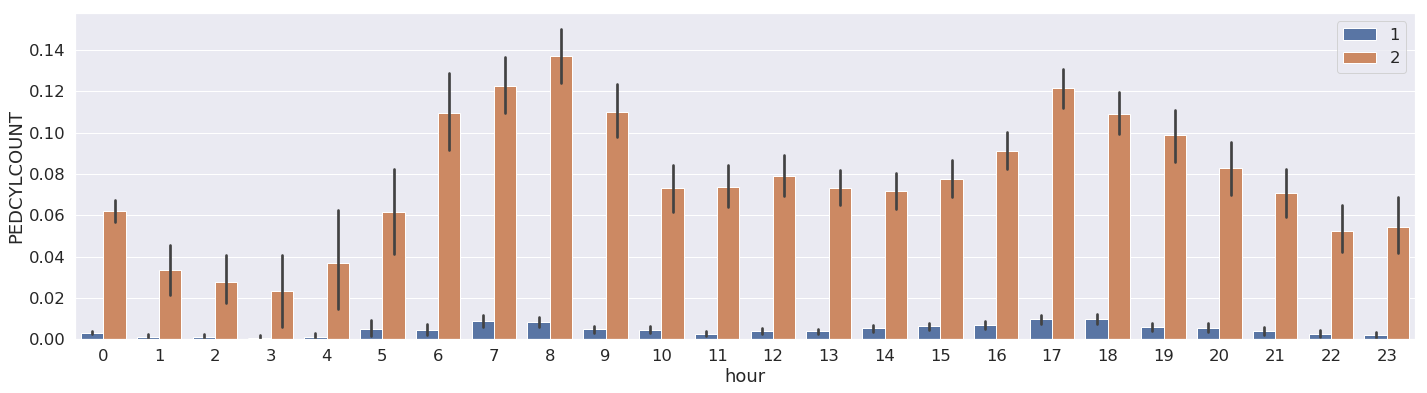

In [52]:
plt.figure(figsize = (24,6))
sns.set(font_scale=1.5)
ax=sns.barplot(data = df,x = "hour",y = "PEDCYLCOUNT",hue="SEVERITYCODE")
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

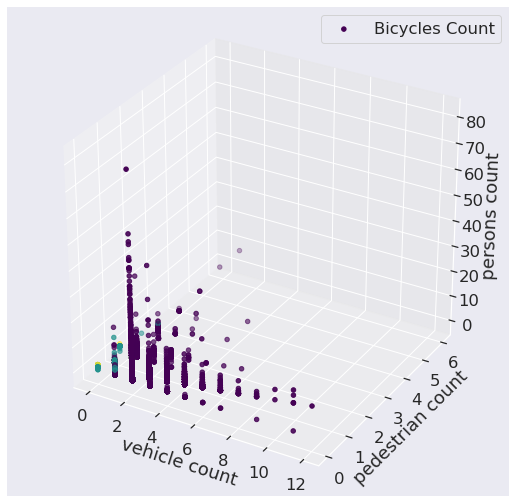

In [62]:
plt.figure(figsize = (9,9))
xdata = df['VEHCOUNT']
ydata = df['PEDCOUNT']
zdata = df['PERSONCOUNT']
cdata= df['PEDCYLCOUNT']
ax=plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata,c=cdata, cmap='viridis', label= 'Bicycles Count')
ax.set_xlabel('vehicle count')
ax.set_ylabel('pedestrian count')
ax.set_zlabel('persons count')
ax.legend(loc='best')
#ax.colorbar(label='Bicycles Count')
plt.show()

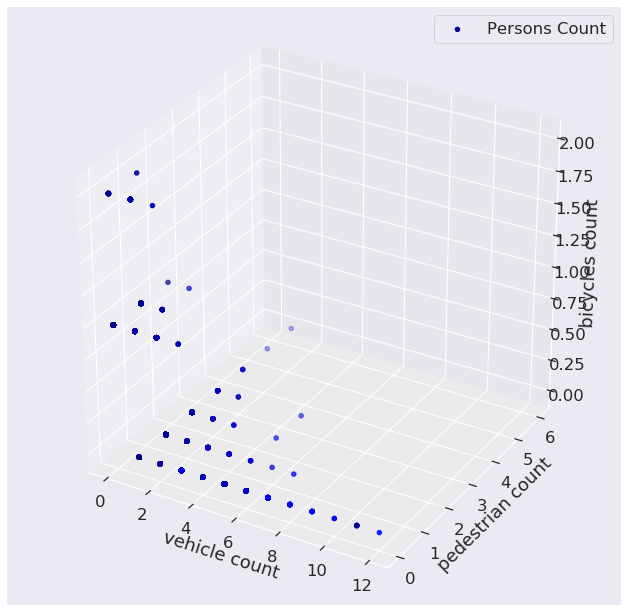

In [64]:
plt.figure(figsize = (11,11))
xdata = df['VEHCOUNT']
ydata = df['PEDCOUNT']
zdata = df['PEDCYLCOUNT']
cdata= df['PERSONCOUNT']
ax=plt.axes(projection='3d')
ax.scatter3D(xdata,ydata,zdata,c=cdata, cmap='jet', label= 'Persons Count')
ax.set_xlabel('vehicle count')
ax.set_ylabel('pedestrian count')
ax.set_zlabel('bicycles count')
ax.legend(loc='best')
#ax.colorbar(label='Bicycles Count')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning:

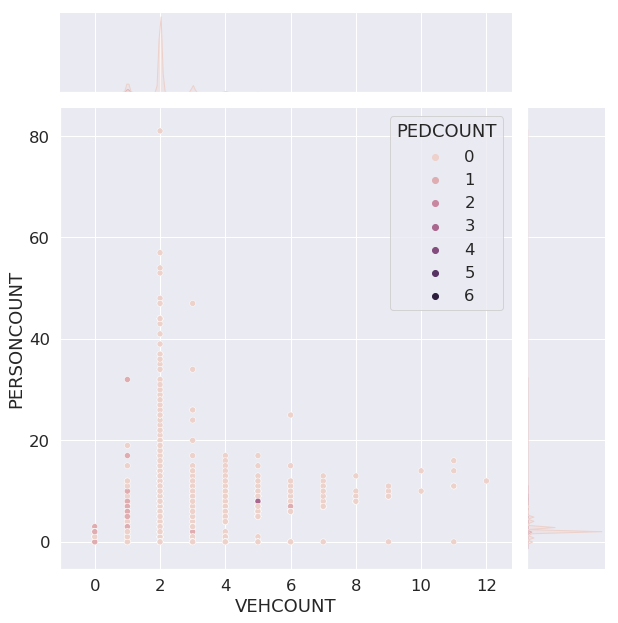

In [39]:
#plt.figure(figsize = (6,12))
sns.set(font_scale=1.5)
ax=sns.jointplot(data=df,x='VEHCOUNT',y='PERSONCOUNT',hue='PEDCOUNT',height=9,cmap='jet')
plt.show()

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning:

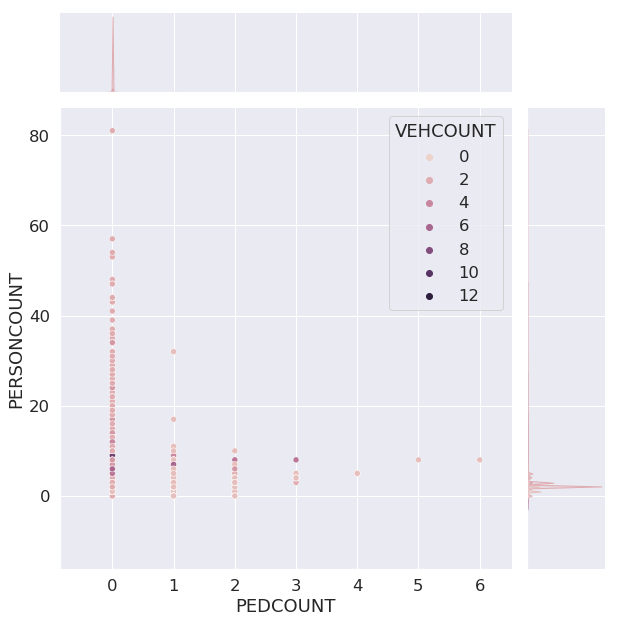

In [40]:
#plt.figure(figsize = (9,9))
sns.set(font_scale=1.5)
ax=sns.jointplot(data=df,x='PEDCOUNT',y='PERSONCOUNT',hue='VEHCOUNT',height=9,cmap='jet')
plt.show()

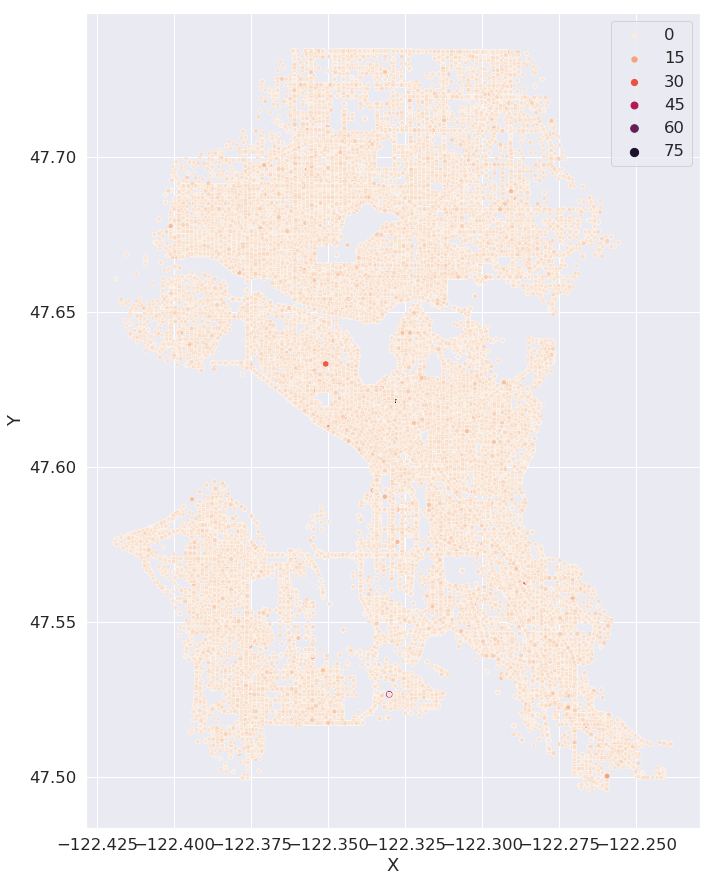

In [41]:
plt.figure(figsize = (11,15))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "X",y = "Y",hue='PERSONCOUNT', size ='PERSONCOUNT',palette='rocket_r', s= 1)
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

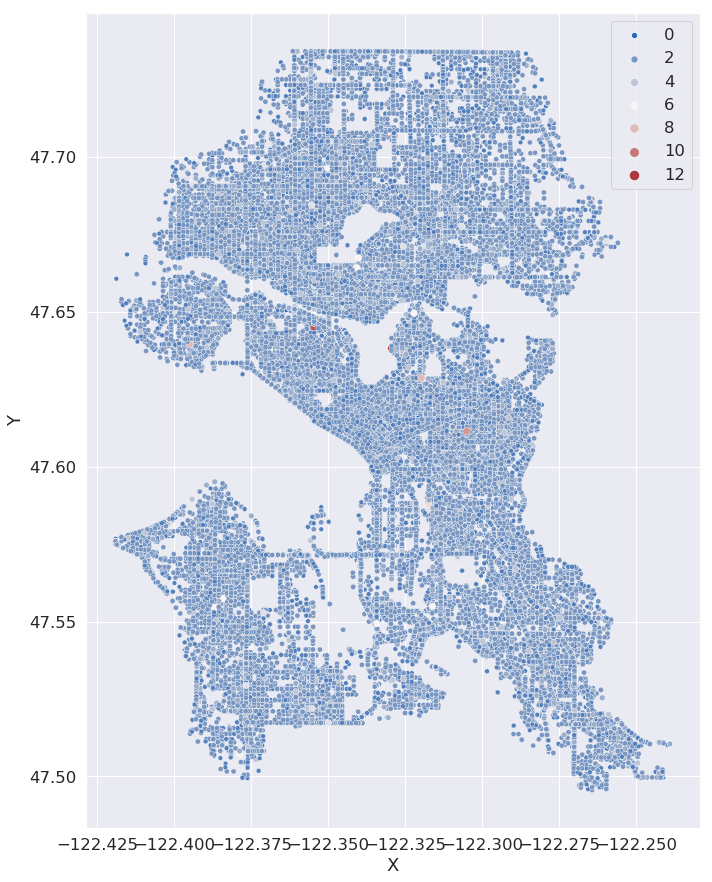

In [42]:
plt.figure(figsize = (11,15))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "X",y = "Y",hue='VEHCOUNT',palette='vlag', size='VEHCOUNT',s= 1)
ax.legend(loc=0)
#plt.yscale("log")
plt.show()

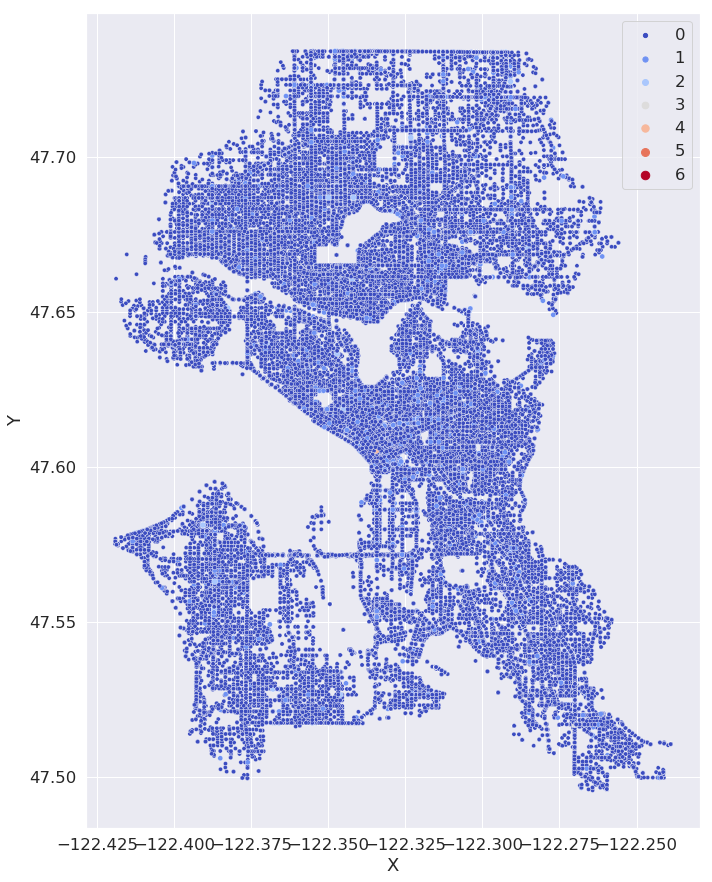

In [43]:
plt.figure(figsize = (11,15))
sns.set(font_scale=1.5)
ax=sns.scatterplot(data = df,x = "X",y = "Y",hue='PEDCOUNT',palette='coolwarm', size='PEDCOUNT',s= 1)
ax.legend(loc=0)
#plt.yscale("log")
plt.show()